<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Restauracion_imgs/restore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP - Restauración de Imágenes
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

###Imports a utilizar

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

####Cargamos imágenes

In [2]:
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/Restauracion_imgs/pic/lenna.png
clear_output()

####mostramos imagen original y definimos funciones a utilizar

In [110]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyBlur(img, k_size=3): #lowpass
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  return cv2.filter2D(img,-1,kernel), kernel

def ApplyNoise(img):
  row,col,ch = img.shape
  mean = 0
  std = 15
  gauss = np.random.normal(mean,std,(row,col,ch))
  gauss = gauss.reshape(row,col,ch)
  noisy = img + gauss.astype(np.int16)
  return noisy.astype(np.int16)

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0, vmax=255)

##Inverse Filter

###Blur

In [210]:
def ExpandKernel(kernel, size):
  delta = np.zeros((size[0], size[1]), dtype=float)
  delta[size[0]//2,size[1]//2] = 1
  return cv2.filter2D(delta, -1, kernel)


def ApplyInverseFilter(degraded, kernel_og):
  kernel = ExpandKernel(kernel_og, (degraded).shape)
  #Kernel Spectrum
  H = np.fft.fft2( np.fft.ifftshift(kernel) )
  #Degraded image spectrum
  G = np.fft.fft2( degraded[:,:,0] )
  # Inverse Filter 
  F_hat = G / H
  aux = np.nan_to_num(F_hat)
  restored = abs( np.fft.ifft2( aux )  )
  restored[restored < 0] = 0
  restored[restored > 255] = 255
  return restored.astype(int)

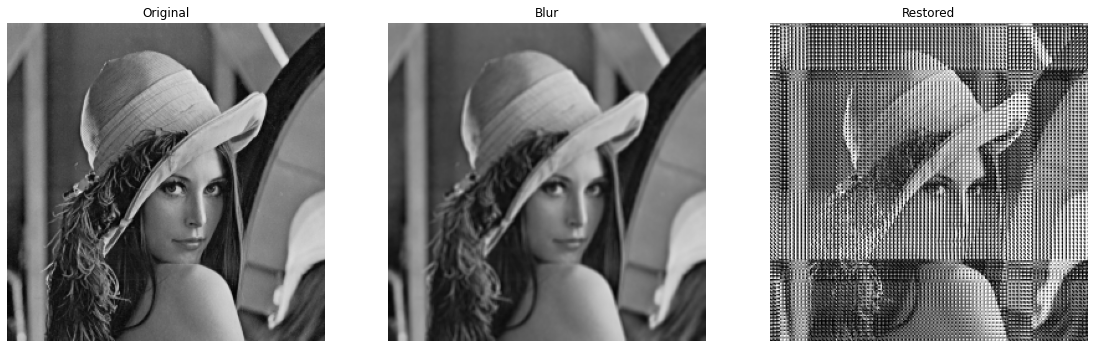

In [211]:
#Original
lenna = cv2.imread('lenna.png')
#
degraded, kernel = ApplyBlur(lenna.astype(float))
restored = ApplyInverseFilter(degraded.astype(float), kernel)
fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
MakeSubplot(lenna,fig_a,1,3,1,title="Original")
MakeSubplot(degraded.astype(int),fig_a,1,3,2,title="Blur")
MakeSubplot(restored,fig_a,1,3,3,title="Restored")

In [6]:
#Original
lenna = cv2.imread('lenna.png')

degraded = ApplyNoise(ApplyBlur(lenna))

fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(lenna,fig_a,1,3,1,title="Original")
MakeSubplot(degraded,fig_a,1,3,2,title="Blur & Noise")



AttributeError: ignored